In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import pandas as pd

#calling dataframe constructor 
df=pd.DataFrame()

print(df)

Empty DataFrame
Columns: []
Index: []


In [3]:
df['Claim_number']=['X%d' % i for i in range(0,10000,1)]

In [4]:
data =np.random.randint(0,8000,size=10000)
df['Paid_Amount']=pd.DataFrame(data,columns=['Paid_Amount'])


In [5]:
df['Date_paid']=pd.DataFrame({'Date_paid':pd.date_range('01/01/2020','01/31/2020',periods=60)})

In [6]:
items=['H1','H2','H3','H4','H5','H6','H7','H8','H9','H9']
df['hospitals']=np.random.choice(items,size=len(df))

In [7]:
items=['V1','V2','V3','V4','V5', 'V6','V7','V8','V9','V10']
df['Vendors']=np.random.choice(items,size=len(df))


In [8]:
df.head()

,Claim_number,Paid_Amount,Date_paid,hospitals,Vendors
0,X0,4743,2020-01-01 00:00:00.000000000,H5,V6
1,X1,436,2020-01-01 12:12:12.203389830,H7,V3
2,X2,5108,2020-01-02 00:24:24.406779661,H6,V5
3,X3,1616,2020-01-02 12:36:36.610169491,H3,V3
4,X4,3861,2020-01-03 00:48:48.813559322,H4,V6


In [9]:
df['Overly Paid']=np.where(df['Paid_Amount']>=5000,True,False)

In [10]:
df.head()

,Claim_number,Paid_Amount,Date_paid,hospitals,Vendors,Overly Paid
0,X0,4743,2020-01-01 00:00:00.000000000,H5,V6,False
1,X1,436,2020-01-01 12:12:12.203389830,H7,V3,False
2,X2,5108,2020-01-02 00:24:24.406779661,H6,V5,True
3,X3,1616,2020-01-02 12:36:36.610169491,H3,V3,False
4,X4,3861,2020-01-03 00:48:48.813559322,H4,V6,False


In [11]:
df['Overly Paid']= df['Overly Paid'].replace(False, 'No')
df['Overly Paid']=df['Overly Paid'].replace(True,'yes')

In [12]:
df.head()

,Claim_number,Paid_Amount,Date_paid,hospitals,Vendors,Overly Paid
0,X0,4743,2020-01-01 00:00:00.000000000,H5,V6,No
1,X1,436,2020-01-01 12:12:12.203389830,H7,V3,No
2,X2,5108,2020-01-02 00:24:24.406779661,H6,V5,yes
3,X3,1616,2020-01-02 12:36:36.610169491,H3,V3,No
4,X4,3861,2020-01-03 00:48:48.813559322,H4,V6,No


In [13]:
import datetime

In [14]:
df['Date_paid'] = pd.to_datetime(df['Date_paid']).dt.date

In [15]:
df.head()

,Claim_number,Paid_Amount,Date_paid,hospitals,Vendors,Overly Paid
0,X0,4743,2020-01-01,H5,V6,No
1,X1,436,2020-01-01,H7,V3,No
2,X2,5108,2020-01-02,H6,V5,yes
3,X3,1616,2020-01-02,H3,V3,No
4,X4,3861,2020-01-03,H4,V6,No


In [16]:
#Importing Libraries for using them
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [17]:
df['Overly Paid'][df['Overly Paid'] == 'No'] = 0
df['Overly Paid'][df['Overly Paid'] == 'yes'] = 1

C:\Users\Vardhan\AppData\Local\Temp\ipykernel_340\2538954198.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Overly Paid'][df['Overly Paid'] == 'No'] = 0
C:\Users\Vardhan\AppData\Local\Temp\ipykernel_340\2538954198.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Overly Paid'][df['Overly Paid'] == 'yes'] = 1


In [18]:
df.head()

,Claim_number,Paid_Amount,Date_paid,hospitals,Vendors,Overly Paid
0,X0,4743,2020-01-01,H5,V6,0
1,X1,436,2020-01-01,H7,V3,0
2,X2,5108,2020-01-02,H6,V5,1
3,X3,1616,2020-01-02,H3,V3,0
4,X4,3861,2020-01-03,H4,V6,0


In [19]:
#Splitting the data and Target of desired dataframe
data=df.iloc[:, 0:5]
target=df.iloc[:, -1:]

In [20]:
target.head()

,Overly Paid
0,0
1,0
2,1
3,0
4,0


In [21]:
#Label encoding data
from sklearn.preprocessing import LabelEncoder

In [22]:
le = LabelEncoder()
data.Claim_number = le.fit_transform(data.Claim_number)
data.hospitals = le.fit_transform(data.hospitals)
data.Vendors = le.fit_transform(data.Vendors)
data.head()


,Claim_number,Paid_Amount,Date_paid,hospitals,Vendors
0,0,4743,2020-01-01,4,6
1,1,436,2020-01-01,6,3
2,1112,5108,2020-01-02,5,5
3,2223,1616,2020-01-02,2,3
4,3334,3861,2020-01-03,3,6


In [23]:
data.describe()

,Claim_number,Paid_Amount,hospitals,Vendors
count,10000.00000,10000.000000,10000.000000,10000.000000
mean,4999.50000,4006.759400,4.407400,4.493700
std,2886.89568,2301.456989,2.721243,2.885168
min,0.00000,0.000000,0.000000,0.000000
25%,2499.75000,1996.750000,2.000000,2.000000
50%,4999.50000,4012.500000,5.000000,5.000000
75%,7499.25000,5997.000000,7.000000,7.000000
max,9999.00000,7998.000000,8.000000,9.000000


In [24]:
#Considering columns which are most useful for the classification
data=data.drop('Date_paid', axis=1)

In [25]:
data=data.drop('Claim_number', axis=1)

In [26]:
data.head()

,Paid_Amount,hospitals,Vendors
0,4743,4,6
1,436,6,3
2,5108,5,5
3,1616,2,3
4,3861,3,6


In [27]:
target.head()

,Overly Paid
0,0
1,0
2,1
3,0
4,0


In [28]:
data= data.astype(int)
target= target.astype(int)

In [29]:
Xtrain, Xtest, ytrain, ytest = train_test_split(data, target,
                                                random_state=0)

In [30]:
#Standardising the dataframe to get it into a single value
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(Xtrain) 
xtest = sc_x.transform(Xtest)

In [31]:
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(7500, 3)
(2500, 3)
(7500, 1)
(2500, 1)


In [34]:
#Checking the precision and recall of a randomforest classifier
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

NameError: name 'ypred' is not defined

In [35]:
#Applying Randomforest
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

C:\Users\Vardhan\AppData\Local\Temp\ipykernel_340\612257564.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(Xtrain, ytrain)


In [36]:
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(7500, 3)
(2500, 3)
(7500, 1)
(2500, 1)


In [37]:
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1517
           1       1.00      1.00      1.00       983

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500



In [38]:
import seaborn as sns

Text(111.12, 0.5, 'predicted label')

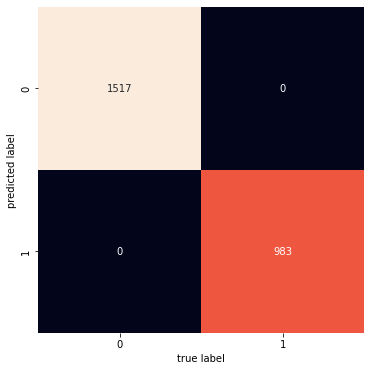

In [39]:
mat = confusion_matrix(ytest, ypred)
plt.figure(figsize=(8, 6))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)#.T here is transpose
plt.xlabel('true label')
plt.ylabel('predicted label')

In [41]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(ytest, ypred))

Accuracy :  1.0
